# Goal 

To forecast bike rental demand in the Capital Bikeshare program in Washington, D.C. by combining historical usage patterns with weather data in order to forecast bike rental demand 

# Insights on bike sharing 

The first bike sharing projects were initiated by local community organisations, or as charitable projects intended for the disadvantaged, or to promote bicycles as a non-polluting form of transport, or they were business enterprises to rent out bicycles. Ernest Callenbach 's novel Ecotopia (1975) illustrated the idea. 

# Wiki 

A bicycle-sharing system, public bicycle scheme,or public bike share (PBS) scheme,is a service in which bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system. Docks are special bike racks that lock the bike, and only release it by computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place. Other systems are dockless.


# Advantages of bike-sharing systems 

They use smart-cards to allow the bicycles to be returned to any station in the system, which facilitates one-way rides to work, education or shopping centres. Thus, one bike may take 10–15 rides a day with different users and can be ridden up to 10,000 km

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city.

# For many systems, smartphone mapping apps show nearby available bikes and open docks. In July 2020, Google Maps began including bike shares in its route recommendations



In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd

In [84]:
filename = ("/content/train (2).csv")

train=pd.read_csv(filename)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Attribute Information:

datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

# My Hypothesis 

General factors that would impact the prediction of increase in bike demand for rentals are -

1) Favourable seasons to enjoy bike ride 

2) Clear Weather conditions suitable for bike riding

3) Holidays for biking recreation purposes

4) Working days - Fitness enthusiasts who may commute to schools/colleges/work during weekdays

In [85]:
train.shape

(10886, 12)

In [86]:
train.isnull().sum() 


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [87]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


There are No null values.


There are some Columns which have interger values for season, holiday,weather,working day columns but these should be categorical data types. We need to encode these so that the system understands the values.


The datetime column is an object with format YYYY Year MM Month and DD Date , appears as a string and we need to convert to "datetime" datatype so that we can leverage the date time library and utiliize that method for further helpful analysis

In [89]:
train.datetime = pd.to_datetime(train.datetime)
train.datetime = pd.to_datetime(train.datetime)

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

With the above code the datetime has been changed from string to a new data type called datetime as required

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [91]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


# Visualizing correlation between Counts and Features

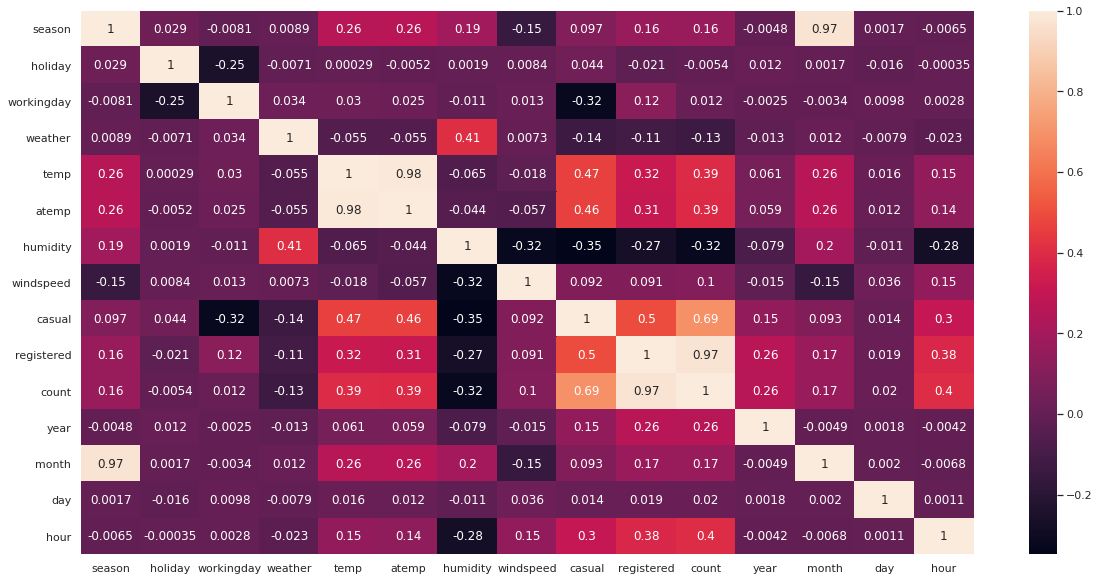

In [92]:
corr_matrix = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Correlation analysis from above matrix  

Lets understand the relationship between cnt (i.e bike rental count) and all other features.

Positively correlated featurea are - temperature,season

Negative correlated features are below  -


Humidity - as humidity goes higher the bike count reduces as its not a favourable condition for biking.


Temp and Atemp - we can see they are highly corelated to each other so we can research to find out if they are redundant features


Weather 

# Further preprocessing steps :

Dummy variables Creation

In the dataset we have some categorical variables like season, weather, holiday,working day


Inorder to include these in our model, we'll need to make dummy variables so that the system understands these values in separate columns . Hence we will use pandas get_dummies() as below - 

In [93]:
dummy_fields = ['season', 'weather', 'holiday', 'workingday']
for each in dummy_fields:
    dummies = pd.get_dummies(train[each], prefix=each, drop_first=False)
    train = pd.concat([train, dummies], axis=1)

fields_to_drop = ['datetime','season', 'weather','holiday','atemp','workingday']
data = train.drop(fields_to_drop, axis=1)


In [94]:
data.head()

,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,holiday_0,holiday_1,workingday_0,workingday_1
0,9.84,81,0.0,3,13,16,2011,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1,9.02,80,0.0,8,32,40,2011,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0
2,9.02,80,0.0,5,27,32,2011,1,1,2,1,0,0,0,1,0,0,0,1,0,1,0
3,9.84,75,0.0,3,10,13,2011,1,1,3,1,0,0,0,1,0,0,0,1,0,1,0
4,9.84,75,0.0,0,1,1,2011,1,1,4,1,0,0,0,1,0,0,0,1,0,1,0


# Data Visualization 

From the below plots we can analyze as follows - 

# 1st box plot 
count shows there are some outliers beyond 600 too

# 2nd plot 
count against season shows (1:spring has least rentals, followed by 4:winter, season 2 & 3 :during summer and fall seasons the bike rentals count is highest so these bikers prefer warmer climates that cold climate.

# 3rd plot 
count against months shows that from March the bike rentals are progressively increasing till July.
For the Year beginning and ending months the bike rentals are least due to the holiday season and cold climate. The variations pattern observed with months is similar to seasons pattern plot.

# 4th plot 
count against month and working day- it is observed that for working days the rental count is higher than non working day which is indicative that bikes are being rented for commuting to offices/schools



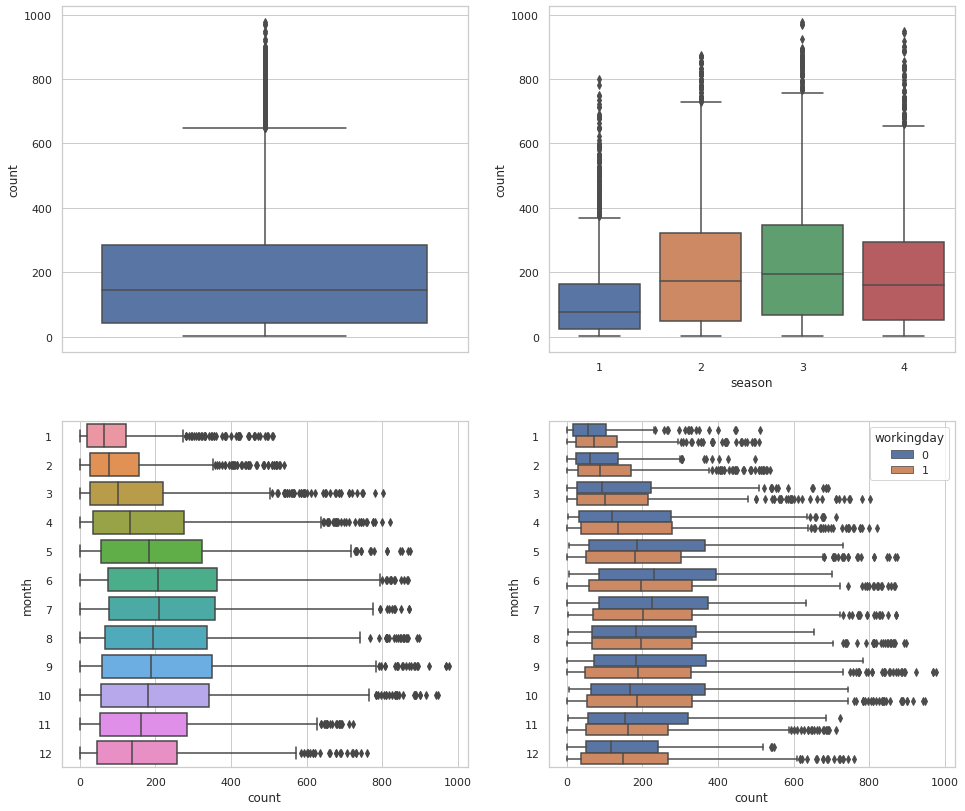

In [95]:
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,14)
sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season',orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='month', x='count',orient='h', ax=axes[1][0])
sns.boxplot(data=train, y='month', x='count', orient='h', hue='workingday',ax=axes[1][1])

## Variation of count with hours


From the below plot 'Variation of count with hours' we see that the count of bike rental during morning hours (7am - 9 am) and in the evening (7pm -8pm) is significantly high when compared to the other time intervals. This evident pattern is because they are using it for commuting to and from office/schools

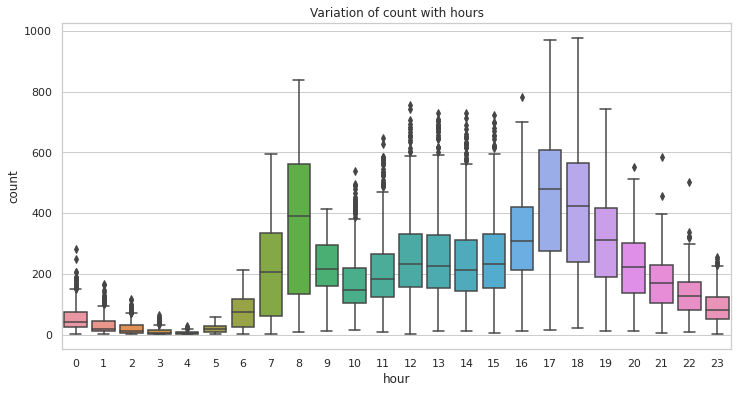

In [96]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data,x="hour", y="count")
ax.set_title('Variation of count with hours')
sns.set(style="whitegrid")

From the below graph 'Variation of hourly count on season for Registered Users_hours' we see that Hourly count of bike rentals for registered users shows that the demand is high during peak morning hours (7 am - 9 am) and evening hours(5 pm - 7pm) which re-emphasizes bikes are being used for commuting to office/school

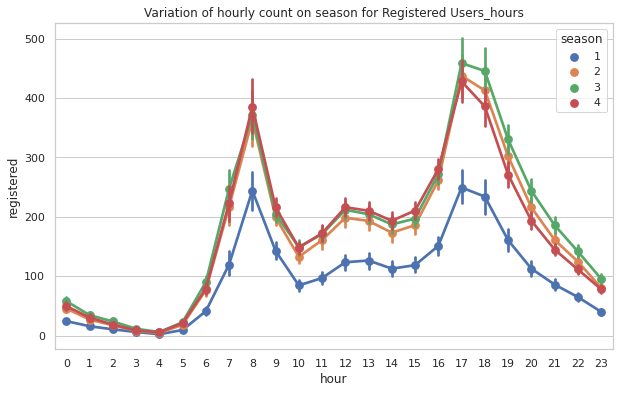

In [97]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x='hour', y='registered', data=train, hue='season')
ax.set_title('Variation of hourly count on season for Registered Users_hours')
sns.set(style="whitegrid")

From the below graph plotted for 'Variation of bike rental count with windspeed' we can see people prefer moderate windspeed as bike rental counts are highest for low windspeed.

Variation of bike rental count with windspeed


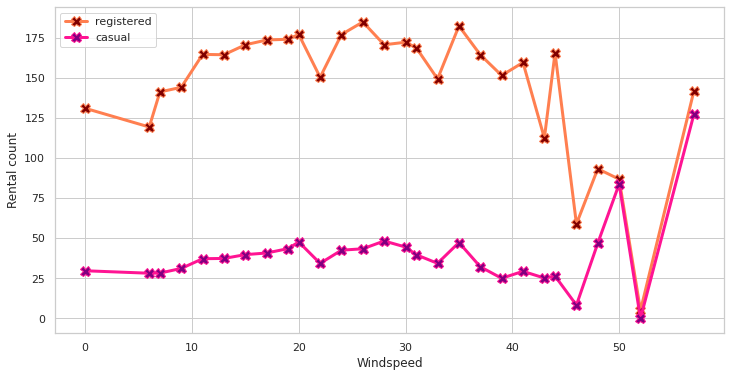

In [98]:
windspeed_reg = data.groupby(['windspeed'])['registered'].mean()
windspeed_cas = data.groupby(['windspeed'])['casual'].mean()
fig,axes = plt.subplots(figsize=(12, 6))

windspeed_reg.plot(kind = 'line', marker='X', markerfacecolor='maroon', markersize= 10, color='coral', linewidth=3)
windspeed_cas.plot(kind = 'line', marker='X', markerfacecolor='purple', markersize= 10, color='deeppink', linewidth=3)
print('Variation of bike rental count with windspeed')

plt.legend(loc='upper left')
plt.xlabel('Windspeed')
plt.ylabel('Rental count')
plt.show()

Lets spearhead our analysis and look at the renting behaviour based on Season 

In [99]:
df_season_spring = train[train['season'] ==1]
df_season_spring['month'].unique()

array([1, 2, 3])

In [100]:
df_season_summer = train[train['season'] ==2]
df_season_summer['month'].unique()

array([4, 5, 6])

In [101]:
df_season_fall = train[train['season'] ==3]
df_season_fall['month'].unique()

array([7, 8, 9])

In [102]:
df_season_winter = train[train['season'] ==4]
df_season_winter['month'].unique()

array([10, 11, 12])

In [103]:
df_season_summer.month.nunique()

3

Lets analyse to see Which month of each season has highest rent and how is weather predicting on rents

Spring and Weather situation


weathersit reference:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Very Sparse Weather condition of 4: Heavy Rain situation in these months

When weather situation is clear rentals are more

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


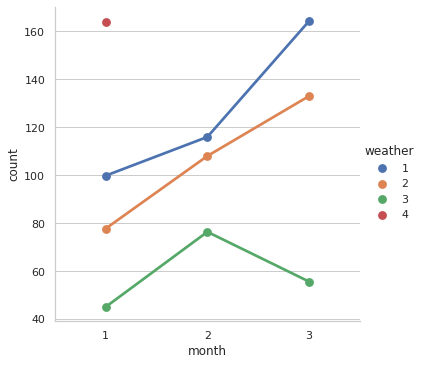

In [104]:
sns.factorplot('month','count',hue='weather',data=df_season_spring,ci=None)
plt.show()

Summer and weather situation


weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

There is NO 4: Heavy Rain situation in these months

The rentals are linearly increasing and high in count

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


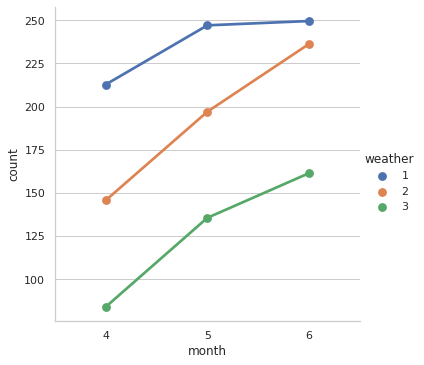

In [105]:
sns.factorplot('month','count',hue='weather',data=df_season_summer,ci=None)
plt.show()

Fall and weather situation

weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

There is NO 4: Heavy Rain situation in these months

When the weather is clear the rentals are high in count and as the weather shows signs of few clouds or light snow the rentals drop in count.



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


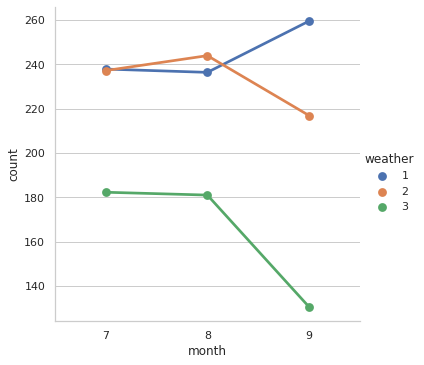

In [106]:
sns.factorplot('month','count',hue='weather',data=df_season_fall,ci=None)
plt.show()

Winter and weather situation

The bike rentals drop due to the cold winters

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


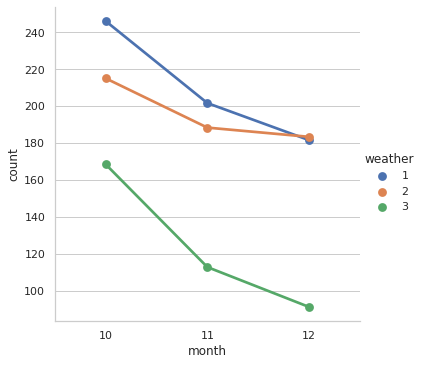

In [107]:
sns.factorplot('month','count',hue='weather',data=df_season_winter,ci=None)
plt.show()

Let's analyse Demand of bikes across the month.

You will see from below graph Highest demand of bikes are in June , July, Aug, Sept, Oct

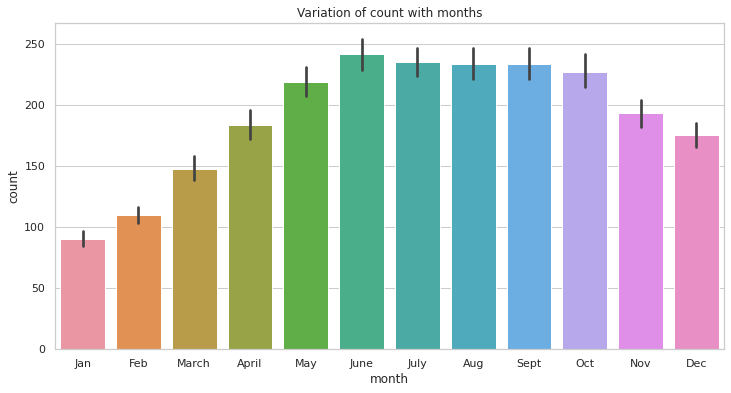

In [108]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='count', data=data)
ax.set_title('Variation of count with months')
sns.set(style="whitegrid")

tick_val=[0,1 , 2, 3, 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(tick_val, tick_lab)
plt.show()

Its important to scale our data now 

Scaling target variables To make training the network easier, we'll standardize each of the continuous variables by scaling the variables such that they have zero mean and a standard deviation of 1.

SD=(x−μ)/SD

In [109]:
quant_features = ['temp', 'humidity', 'windspeed']

scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

data.head()

,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,holiday_0,holiday_1,workingday_0,workingday_1
0,-1.333599,0.993167,-1.567682,3,13,16,2011,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1,-1.438841,0.941206,-1.567682,8,32,40,2011,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0
2,-1.438841,0.941206,-1.567682,5,27,32,2011,1,1,2,1,0,0,0,1,0,0,0,1,0,1,0
3,-1.333599,0.681399,-1.567682,3,10,13,2011,1,1,3,1,0,0,0,1,0,0,0,1,0,1,0
4,-1.333599,0.681399,-1.567682,0,1,1,2011,1,1,4,1,0,0,0,1,0,0,0,1,0,1,0


In [110]:
data.shape

(10886, 22)

In [111]:
# Separate the data into features and targets
target_fields = ['count', 'casual', 'registered']

X = data.drop(target_fields, axis=1)
y = data['count']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print("Train_set: ", X_train.shape)
print("Test_set: ", X_test.shape)

Train_set:  (9797, 19)
Test_set:  (1089, 19)


In [113]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [114]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_features=10,min_samples_leaf=3,random_state=43)
rf.fit(X_train, y_train)

rf_prediction = rf.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))

MSE: 2130.3494811575097


In [115]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9721202513176204
0.9362358017952195


In [116]:
X_train.shape , y_train.shape

((9797, 19), (9797,))

In [117]:
X_test.shape , y_test.shape


((1089, 19), (1089,))

In [118]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(min_samples_split=25,random_state=0)

dt_reg.fit(X_train, y_train)
dt_prediction = dt_reg.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))

MSE: 2835.1827051767104


In [119]:
test=pd.read_csv('/content/test (2).csv')

test.datetime = pd.to_datetime(train.datetime)

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [120]:
datetime_col=test.datetime

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 659.6 KB


In [122]:
test.shape

(6493, 13)

In [123]:
dummy_fields = ['season', 'weather', 'holiday', 'workingday']
for each in dummy_fields:
    dummies = pd.get_dummies(test[each], prefix=each, drop_first=False)
    test = pd.concat([test, dummies], axis=1)

fields_to_drop = ['datetime','season', 'weather','holiday','atemp','workingday']
data1 = test.drop(fields_to_drop, axis=1)

In [124]:
test_season_spring = test[test['season'] ==1]
test_season_spring['month'].unique()

array([1, 2, 7, 8, 9, 3])

In [125]:
test_season_summer = test[test['season'] ==2]
test_season_summer['month'].unique()

array([ 2,  3,  9, 10, 11])

In [126]:
test_season_fall = test[test['season'] ==3]
test_season_fall['month'].unique()

array([ 3,  4,  5, 11, 12,  1])

In [127]:
test_season_winter = test[test['season'] ==4]
test_season_winter['month'].unique()

array([5, 6, 7, 1, 2])

In [128]:
quant_features = ['temp', 'humidity', 'windspeed']

scaled_features = {}
for each in quant_features:
    mean, std = data1[each].mean(), data1[each].std()
    scaled_features[each] = [mean, std]
    data1.loc[:, each] = (data1[each] - mean)/std

data1.head()

,temp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,holiday_0,holiday_1,workingday_0,workingday_1
0,-1.235871,-0.42114,1.620763,2011,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1
1,-1.235871,-0.42114,-1.531021,2011,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1
2,-1.235871,-0.42114,-1.531021,2011,1,1,2,1,0,0,0,1,0,0,0,1,0,0,1
3,-1.235871,-0.42114,-0.197543,2011,1,1,3,1,0,0,0,1,0,0,0,1,0,0,1
4,-1.235871,-0.42114,-0.197543,2011,1,1,4,1,0,0,0,1,0,0,0,1,0,0,1


In [129]:
data1.shape

(6493, 19)

In [130]:
X_test=data1.iloc[:,:].values
X_test.shape

(6493, 19)

In [131]:
y_output=rf.predict(X_test)
y_output

array([  9.76675341,   4.90551113,   3.70366432, ..., 190.70029156,
       250.70897152, 256.4384126 ])

In [132]:
rounded_final=list(map(int,map(round,y_output)))